In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.utils import resample
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

In [2]:
data = pd.read_json("News_Category_Dataset.json", lines=True)
data.head()

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22


In [3]:
data.columns

Index(['link', 'headline', 'category', 'short_description', 'authors', 'date'], dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209527 entries, 0 to 209526
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   link               209527 non-null  object        
 1   headline           209527 non-null  object        
 2   category           209527 non-null  object        
 3   short_description  209527 non-null  object        
 4   authors            209527 non-null  object        
 5   date               209527 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 9.6+ MB


In [5]:
data.isnull().sum()

link                 0
headline             0
category             0
short_description    0
authors              0
date                 0
dtype: int64

In [6]:
data = data.drop(columns=['link', 'authors', 'date'])

In [7]:
data.columns

Index(['headline', 'category', 'short_description'], dtype='object')

In [8]:
data.head()

,headline,category,short_description
0,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...
1,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...
2,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha..."
3,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to..."
4,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...


In [9]:
data.duplicated().sum()

471

In [10]:
data = data.drop_duplicates()

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209056 entries, 0 to 209526
Data columns (total 3 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   headline           209056 non-null  object
 1   category           209056 non-null  object
 2   short_description  209056 non-null  object
dtypes: object(3)
memory usage: 6.4+ MB


In [12]:
data['category'].nunique()

42

In [13]:
data['category'].value_counts()

POLITICS          35585
WELLNESS          17940
ENTERTAINMENT     17358
TRAVEL             9897
STYLE & BEAUTY     9681
PARENTING          8763
HEALTHY LIVING     6689
QUEER VOICES       6344
FOOD & DRINK       6340
BUSINESS           5990
COMEDY             5390
SPORTS             5077
BLACK VOICES       4580
HOME & LIVING      4288
PARENTS            3897
THE WORLDPOST      3664
WEDDINGS           3653
CRIME              3558
WOMEN              3487
IMPACT             3483
DIVORCE            3423
WORLD NEWS         3297
MEDIA              2942
WEIRD NEWS         2777
GREEN              2617
WORLDPOST          2579
RELIGION           2570
STYLE              2247
SCIENCE            2206
TASTE              2096
TECH               2055
MONEY              1756
ARTS               1509
ENVIRONMENT        1443
FIFTY              1401
GOOD NEWS          1398
U.S. NEWS          1377
ARTS & CULTURE     1338
COLLEGE            1144
LATINO VOICES      1130
CULTURE & ARTS     1073
EDUCATION       

In [14]:
data['category'].unique()

array(['U.S. NEWS', 'COMEDY', 'PARENTING', 'WORLD NEWS', 'CULTURE & ARTS',
       'TECH', 'SPORTS', 'ENTERTAINMENT', 'POLITICS', 'WEIRD NEWS',
       'ENVIRONMENT', 'EDUCATION', 'CRIME', 'SCIENCE', 'WELLNESS',
       'BUSINESS', 'STYLE & BEAUTY', 'FOOD & DRINK', 'MEDIA',
       'QUEER VOICES', 'HOME & LIVING', 'WOMEN', 'BLACK VOICES', 'TRAVEL',
       'MONEY', 'RELIGION', 'LATINO VOICES', 'IMPACT', 'WEDDINGS',
       'COLLEGE', 'PARENTS', 'ARTS & CULTURE', 'STYLE', 'GREEN', 'TASTE',
       'HEALTHY LIVING', 'THE WORLDPOST', 'GOOD NEWS', 'WORLDPOST',
       'FIFTY', 'ARTS', 'DIVORCE'], dtype=object)

In [15]:
data.shape

(209056, 3)

In [16]:
categories_to_keep = [
    'PARENTING', 'CULTURE & ARTS', 'SPORTS', 'TECH', 'EDUCATION', 
    'SCIENCE', 'WELLNESS', 'BUSINESS', 'TRAVEL', 'MONEY', 'RELIGION', 
    'POLITICS', 'ENTERTAINMENT', 'FOOD & DRINK', 'STYLE & BEAUTY', 'CRIME'
]
# Filter the dataframe to keep only rows with the specified categories
data_filtered = data[data['category'].isin(categories_to_keep)]

In [17]:
data_filtered.shape

(130863, 3)

In [18]:
data_filtered['category'].unique()

array(['PARENTING', 'CULTURE & ARTS', 'TECH', 'SPORTS', 'ENTERTAINMENT',
       'POLITICS', 'EDUCATION', 'CRIME', 'SCIENCE', 'WELLNESS',
       'BUSINESS', 'STYLE & BEAUTY', 'FOOD & DRINK', 'TRAVEL', 'MONEY',
       'RELIGION'], dtype=object)

In [19]:
data_filtered['category'].value_counts()

POLITICS          35585
WELLNESS          17940
ENTERTAINMENT     17358
TRAVEL             9897
STYLE & BEAUTY     9681
PARENTING          8763
FOOD & DRINK       6340
BUSINESS           5990
SPORTS             5077
CRIME              3558
RELIGION           2570
SCIENCE            2206
TECH               2055
MONEY              1756
CULTURE & ARTS     1073
EDUCATION          1014
Name: category, dtype: int64

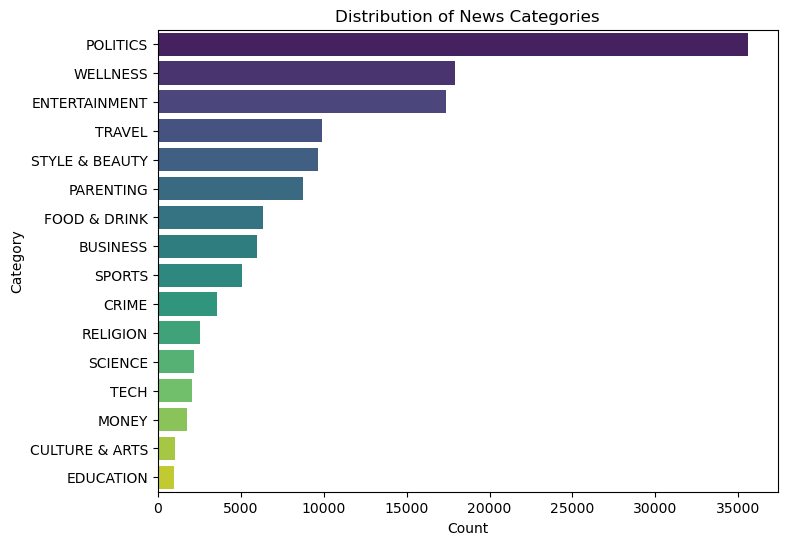

In [20]:
plt.figure(figsize=(8, 6))

# Plot the value counts for the categories
sns.countplot(data=data_filtered, y='category', order=data_filtered['category'].value_counts().index, palette='viridis')

# Add labels and title
plt.xlabel('Count')
plt.ylabel('Category')
plt.title('Distribution of News Categories')
plt.show()

In [21]:
categories_to_remove = ['TECH', 'MONEY', 'CULTURE & ARTS', 'EDUCATION', 'SCIENCE', 'RELIGION']
data_filtered = data_filtered[~data_filtered['category'].isin(categories_to_remove)]

In [22]:
target_count = 10000

# Downsample the top three categories to 12,000
top_categories = ['POLITICS', 'WELLNESS', 'ENTERTAINMENT']
downsampled_data = []

for category in top_categories:
    category_data = data_filtered[data_filtered['category'] == category]
    downsampled_category = resample(category_data, replace=False, n_samples=target_count, random_state=42)
    downsampled_data.append(downsampled_category)

# Concatenate the downsampled categories with the rest of the data
remaining_data = data_filtered[~data_filtered['category'].isin(top_categories)]
data_balanced = pd.concat([remaining_data] + downsampled_data, ignore_index=True)

In [23]:
# Verify the new distribution
data_balanced['category'].value_counts()

POLITICS          10000
WELLNESS          10000
ENTERTAINMENT     10000
TRAVEL             9897
STYLE & BEAUTY     9681
PARENTING          8763
FOOD & DRINK       6340
BUSINESS           5990
SPORTS             5077
CRIME              3558
Name: category, dtype: int64

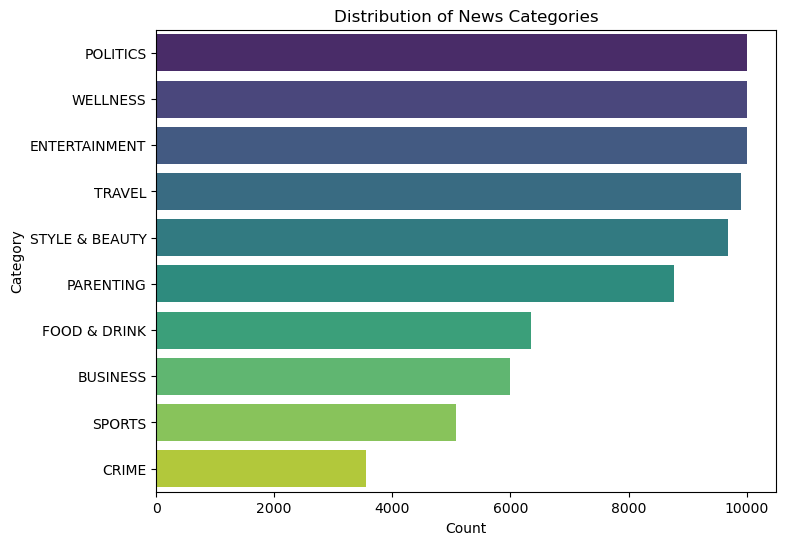

In [24]:
plt.figure(figsize=(8, 6))

# Plot the value counts for the categories
sns.countplot(data=data_balanced, y='category', order=data_balanced['category'].value_counts().index, palette='viridis')

# Add labels and title
plt.xlabel('Count')
plt.ylabel('Category')
plt.title('Distribution of News Categories')
plt.show()

In [25]:
# Combine 'headline' and 'short_description' into a single column
data_balanced['text'] = data_balanced['headline'] + " " + data_balanced['short_description']

def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    tokens = text.split()
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

In [26]:
data_balanced['processed_text'] = data_balanced['text'].apply(preprocess_text)

In [ ]:
data_balanced['processed_sd'] = data_balanced['short_description'].apply(preprocess_text)

In [ ]:
data_balanced[['processed_text', 'processed_sd']].head()

,processed_text,processed_sd
0,funniest tweet parent week sept accidentally p...,accidentally put grownup toothpaste toddler to...
1,maury will basestealing shortstop dodger dy ma...,maury will helped los angeles dodger win three...
2,la vega ace win first wnba title chelsea gray ...,la vega never professional sport champion sunday
3,boston marathon make race inclusive nonbinary ...,race organizer say nonbinary athlete wont regi...
4,anthony varvaro mlb pitcher turned transit cop...,varvaro pitched mostly atlanta brave started l...


In [29]:
data_balanced.to_csv("preprocessed_data.csv", index=False)

In [5]:
df = pd.read_csv("preprocessed_data.csv")

In [6]:
df.isnull().sum()

headline                1
category                0
short_description    5108
text                    0
processed_text          2
processed_sd         5223
dtype: int64

In [7]:
df = df.dropna()

In [8]:
df.isnull().sum()

headline             0
category             0
short_description    0
text                 0
processed_text       0
processed_sd         0
dtype: int64

In [9]:
df.to_csv("preprocessed_data.csv", index=False)